In [1]:
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
df = pd.read_csv(r"/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")

In [3]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [5]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

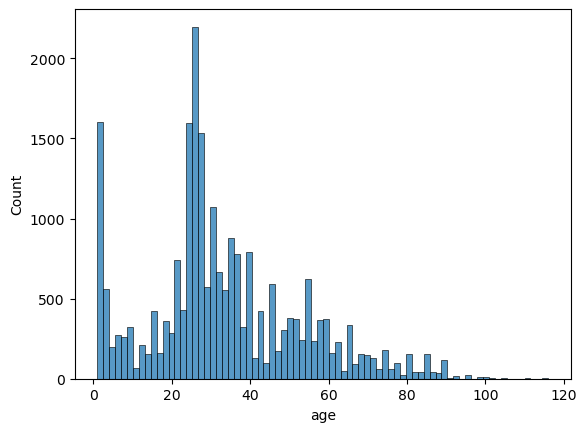

In [6]:
sns.histplot(df['age'])

<Axes: xlabel='gender', ylabel='Count'>

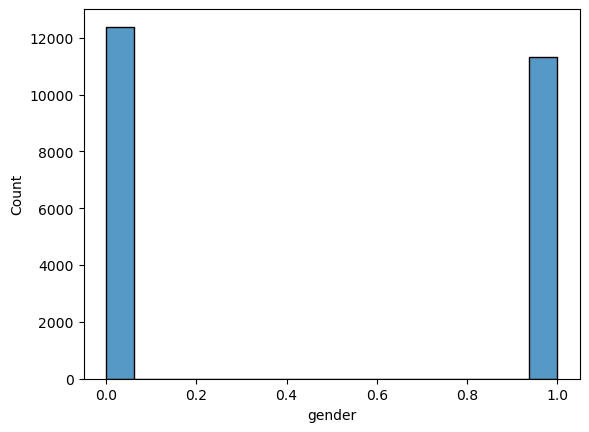

In [7]:
sns.histplot(df['gender'])

<Axes: xlabel='ethnicity', ylabel='Count'>

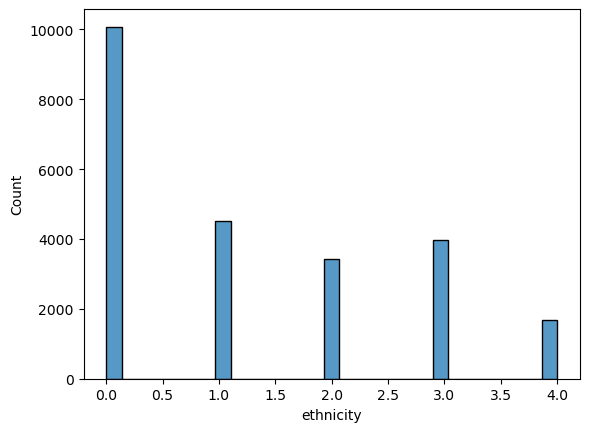

In [8]:
sns.histplot(df['ethnicity'])

In [9]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [10]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [11]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [12]:
df['pixels']

0        129 128 128 126 127 130 133 135 139 142 145 14...
1        164 74 111 168 169 171 175 182 184 188 193 199...
2        67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        193 197 198 200 199 200 202 203 204 205 208 21...
4        202 205 209 210 209 209 210 211 212 214 218 21...
                               ...                        
23700    127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701    23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702    59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703    45 108 120 156 206 197 140 180 191 199 204 207...
23704    156 161 160 165 170 173 166 177 183 191 187 18...
Name: pixels, Length: 23705, dtype: object

In [13]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split() , dtype="float32"))

In [14]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [15]:
df['pixels'] = df['pixels'].apply(lambda x: x/255)

In [16]:
df['pixels']

0        [0.5058824, 0.5019608, 0.5019608, 0.49411765, ...
1        [0.6431373, 0.2901961, 0.43529412, 0.65882355,...
2        [0.2627451, 0.27450982, 0.2784314, 0.27450982,...
3        [0.75686276, 0.77254903, 0.7764706, 0.78431374...
4        [0.7921569, 0.8039216, 0.81960785, 0.8235294, ...
                               ...                        
23700    [0.49803922, 0.39215687, 0.36862746, 0.3176470...
23701    [0.09019608, 0.10980392, 0.1254902, 0.13725491...
23702    [0.23137255, 0.19607843, 0.14509805, 0.1568627...
23703    [0.1764706, 0.42352942, 0.47058824, 0.6117647,...
23704    [0.6117647, 0.6313726, 0.627451, 0.64705884, 0...
Name: pixels, Length: 23705, dtype: object

In [17]:
x = np.array(df['pixels'].to_list())
x

array([[0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
        0.57254905],
       [0.6431373 , 0.2901961 , 0.43529412, ..., 0.7137255 , 0.6666667 ,
        0.5803922 ],
       [0.2627451 , 0.27450982, 0.2784314 , ..., 0.4392157 , 0.43529412,
        0.42352942],
       ...,
       [0.23137255, 0.19607843, 0.14509805, ..., 0.38431373, 0.30588236,
        0.30588236],
       [0.1764706 , 0.42352942, 0.47058824, ..., 0.1254902 , 0.13725491,
        0.13725491],
       [0.6117647 , 0.6313726 , 0.627451  , ..., 0.74509805, 0.72156864,
        0.68235296]], dtype=float32)

In [18]:
x = x.reshape(23705, 48, 48)

In [19]:
x

array([[[0.5058824 , 0.5019608 , 0.5019608 , ..., 0.4627451 ,
         0.3882353 , 0.20784314],
        [0.50980395, 0.5058824 , 0.5019608 , ..., 0.45882353,
         0.38431373, 0.20392157],
        [0.5137255 , 0.5058824 , 0.50980395, ..., 0.44705883,
         0.38039216, 0.19607843],
        ...,
        [0.4745098 , 0.5411765 , 0.5764706 , ..., 0.5921569 ,
         0.5882353 , 0.5803922 ],
        [0.45882353, 0.5372549 , 0.57254905, ..., 0.58431375,
         0.5803922 , 0.5803922 ],
        [0.4509804 , 0.5294118 , 0.5568628 , ..., 0.57254905,
         0.57254905, 0.57254905]],

       [[0.6431373 , 0.2901961 , 0.43529412, ..., 0.43529412,
         0.43529412, 0.40784314],
        [0.7019608 , 0.27450982, 0.5019608 , ..., 0.4392157 ,
         0.44313726, 0.42352942],
        [0.6901961 , 0.2784314 , 0.57254905, ..., 0.4392157 ,
         0.4392157 , 0.42745098],
        ...,
        [0.7529412 , 0.76862746, 0.92156863, ..., 0.43529412,
         0.4862745 , 0.4392157 ],
        [0.9

In [20]:
y = df['gender']

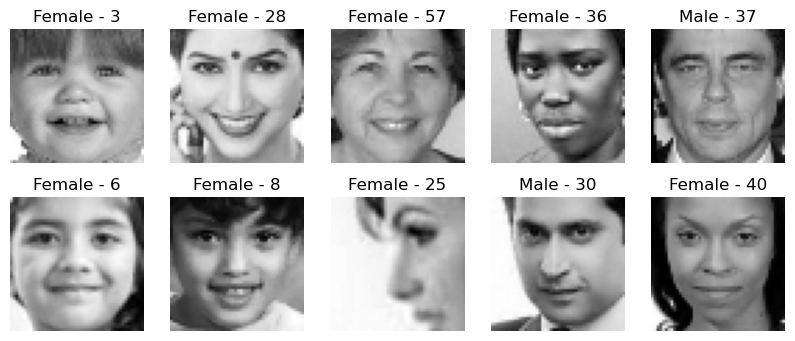

In [21]:
import random
gender_labels = ['Male', 'Female']
plt.figure(figsize=(10,4))
for i in range(0,10) :
    plt.subplot(2,5,i+1)
    plt.axis('off')
    ind = random.randint(1,23704)
    plt.imshow(x[ind].reshape(48, 48),cmap='gray')
    gender =  gender_labels[int(np.array(df['gender'])[ind])]
    plt.title('%s - %s' % (gender, np.array(df['age'])[ind]))

In [22]:
imshape = (48, 48, 1)
x = x.reshape(x.shape[0],*imshape)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=31)

In [24]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D

In [25]:
model = Sequential()
model.add(Conv2D(36, (3, 3), input_shape=(48,48,1), activation='relu'))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(72, (3, 3), activation='relu'))
model.add(Conv2D(72, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2304, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 36)        360       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 48)        15600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 48)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 72)        31176     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 72)        46728     
                                                        

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [29]:
xtest = xtest.reshape(4741, 48, 48, 1)

In [30]:
# ytest.shape

In [31]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50, batch_size=370, verbose=0)

2023-08-31 10:47:08.064845: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


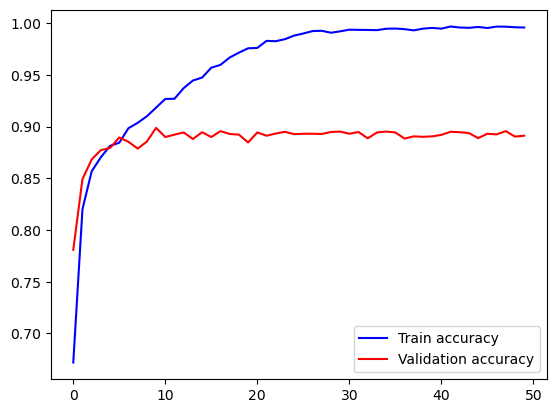

In [32]:
# plt.plot(history.history['val_accuracy'])
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.legend()

In [33]:
#Train Accuracy:
print("Train accuracy: ",accuracy[-1])

Train accuracy:  0.9957814812660217


In [34]:
#Validation Accuracy:
print("Validation accuracy: ",val_accuracy[-1])

Validation accuracy:  0.8911622166633606


In [35]:
preds = model.predict(xtest)
preds

149/149 [==============================] - 1s 3ms/step


array([[9.9985814e-01, 1.4178116e-04],
       [1.0000000e+00, 2.0113294e-14],
       [2.5000674e-10, 1.0000000e+00],
       ...,
       [6.8172884e-01, 3.1827110e-01],
       [5.5944020e-06, 9.9999440e-01],
       [4.8044617e-09, 1.0000000e+00]], dtype=float32)

In [36]:
xtest.shape

(4741, 48, 48, 1)

1/1 [==============================] - 0s 82ms/step


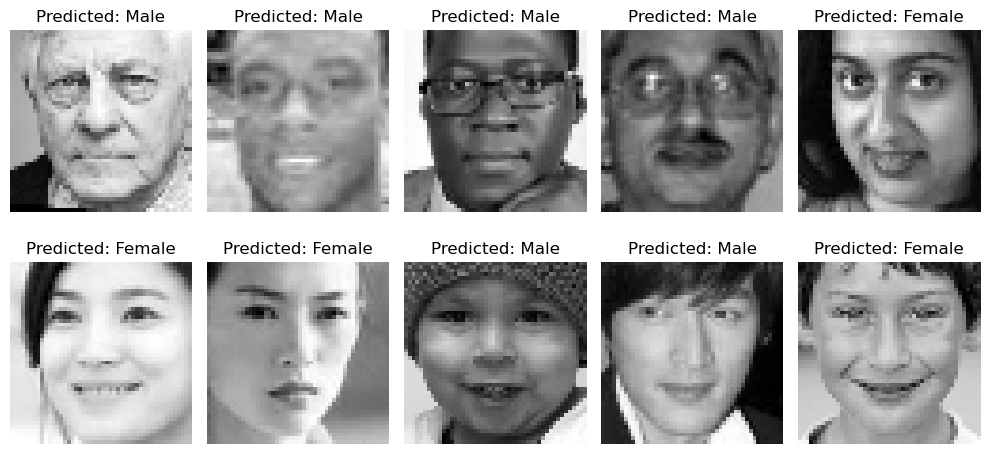

In [37]:
import random
ll = []
for i in range(10):
    ll.append(random.randint(1, 4741))
preds = model.predict(xtest[ll])
ctr = 0
plt.figure(figsize=(10, 5))
for i in ll:
    arr = np.asarray(np.array(xtest[i]))
    plt.subplot(2, 5, ctr + 1)
    plt.axis('off')
    if preds[ctr][0] > preds[ctr][1]:
        plt.title('Predicted: Male')
    else:
        plt.title('Predicted: Female')
    plt.imshow(arr.reshape(48, 48), cmap='gray')
    ctr = ctr + 1
plt.tight_layout() 
plt.show()

In [38]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3), padding='same',input_shape=[48,48, 1]))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(GlobalAveragePooling2D())
model1.add(Flatten())
model1.add(Dense(128,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(64,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(1,activation="relu"))

In [39]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                      

In [40]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [41]:
history1 = model1.fit(xtrain, ytrain, validation_data = (xtest,ytest), epochs = 25)

Epoch 1/25
593/593 [==============================] - 7s 6ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.3746 - val_mse: 0.3746
Epoch 2/25
593/593 [==============================] - 3s 6ms/step - loss: 0.3748 - mse: 0.3748 - val_loss: 0.2887 - val_mse: 0.2887
Epoch 3/25
593/593 [==============================] - 3s 6ms/step - loss: 0.3067 - mse: 0.3067 - val_loss: 0.2903 - val_mse: 0.2903
Epoch 4/25
593/593 [==============================] - 4s 7ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.3070 - val_mse: 0.3070
Epoch 5/25
593/593 [==============================] - 3s 6ms/step - loss: 0.2401 - mse: 0.2401 - val_loss: 0.2607 - val_mse: 0.2607
Epoch 6/25
593/593 [==============================] - 3s 6ms/step - loss: 0.2321 - mse: 0.2321 - val_loss: 0.2449 - val_mse: 0.2449
Epoch 7/25
593/593 [==============================] - 4s 6ms/step - loss: 0.2290 - mse: 0.2290 - val_loss: 0.3756 - val_mse: 0.3756
Epoch 8/25
593/593 [==============================] - 3s 6ms/step - loss: 0.

In [42]:
model1.evaluate(xtest, ytest)

149/149 [==============================] - 0s 3ms/step - loss: 0.2123 - mse: 0.2123


[0.21227730810642242, 0.21227730810642242]

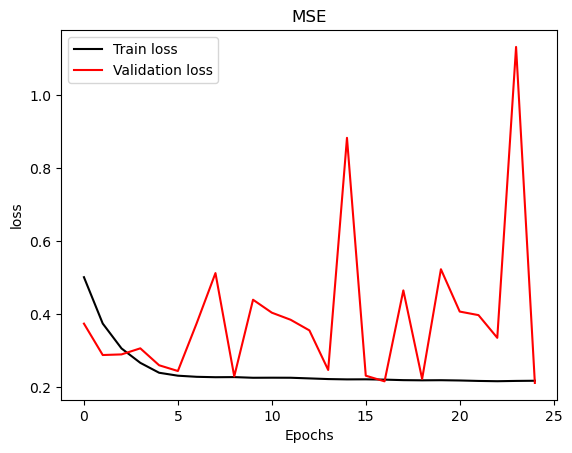

In [43]:
# fig, ax = plt.subplots()
# ax.plot(history1.history['loss'], 'black', label='train loss')   
# ax.plot(history1.history['val_loss'], 'red', label='val loss') 
# ax.set_xlabel('epoch')
# ax.set_ylabel('loss')
# ax.legend()
# plt.show()
fig, ax = plt.subplots()
ax.plot(history1.history['loss'], 'black', label='Train loss')
ax.plot(history1.history['val_loss'], 'red', label='Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('loss')
ax.set_title('MSE')
# ax.set_ylim(0.43, 0.49)
ax.legend()
plt.show()


In [44]:
preds1 = model1.predict(xtest)

149/149 [==============================] - 0s 2ms/step


In [45]:
preds1 = model1.predict(xtest) 
y1 = np.argmax(preds1)

149/149 [==============================] - 0s 2ms/step


In [46]:
preds1

array([[0.40205878],
       [0.24001208],
       [0.8229624 ],
       ...,
       [0.62896585],
       [0.606089  ],
       [0.61834574]], dtype=float32)

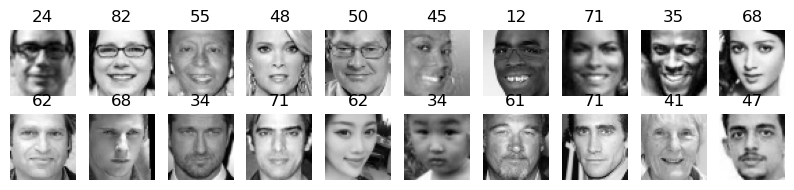

In [52]:
plt.figure(figsize=(10,2))
n_test = xtest.shape[0]
i=1
for j in range(len(xtest)) :
    if (i<=20):
        plt.subplot(2,10,i)
        plt.axis('off')
        plt.imshow(xtest[i].reshape(48, 48), cmap='gray')
        plt.title(int(preds1[i]*100))
        i+=1